In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [52]:
#(ds_image, ds_test) (ds_t, ds_w), info = tfds.load('rock_paper_scissors', split = ['train','test'], shuffle_files = True, as_supervised = True, with_info = True, batch_size = -1)

(ds_train, ds_test), info = tfds.load('rock_paper_scissors', split = ['train','test'], shuffle_files = True, as_supervised = True, with_info = True, batch_size = -1)

# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

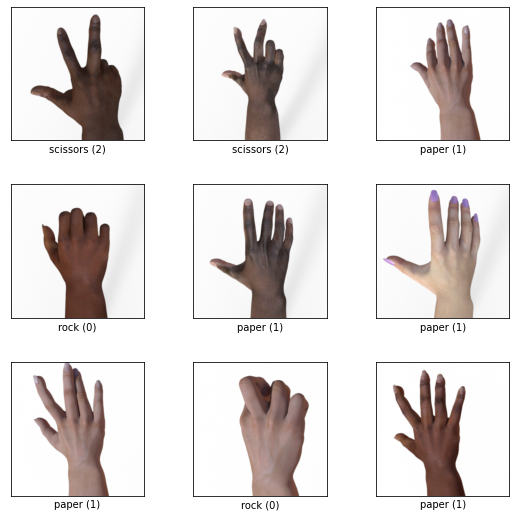

In [18]:
fig = tfds.show_examples(ds_train, info)
plt.show(fig)

In [68]:
# (3,3) convolution window. Convolutional layer 1 has 32 output channels while layers 1,2 have 64 output channels. 
# Dimensionality of the tensor decreases as more conv and pooling layers are passed.
# As dimensionality decreases, we can afford to add more output channels (from 32 to 64) deeper in the model.
model = models.Sequential()
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

#Dense layers: flatten tensor into vector for dense layer input
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(9))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 299, 299, 16)      208       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 71, 71, 32)        9248      
                                                                 
 flatten_8 (Flatten)         (None, 161312)           

In [71]:

X_train = ds_train[0]
y_train = ds_train[1]

X_test = ds_test[0]
y_test = ds_test[1]



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 4s 40ms/step - loss: 18.8551 - accuracy: 0.8937 - val_loss: 18.4472 - val_accuracy: 0.7097
Epoch 2/10
79/79 [==============================] - 3s 38ms/step - loss: 0.1024 - accuracy: 0.9952 - val_loss: 27.2435 - val_accuracy: 0.6667
Epoch 3/10
79/79 [==============================] - 3s 38ms/step - loss: 9.0847e-05 - accuracy: 1.0000 - val_loss: 27.5678 - val_accuracy: 0.6694
Epoch 4/10
79/79 [==============================] - 3s 38ms/step - loss: 1.8170e-06 - accuracy: 1.0000 - val_loss: 27.5725 - val_accuracy: 0.6667
Epoch 5/10
79/79 [==============================] - 3s 38ms/step - loss: 1.7173e-06 - accuracy: 1.0000 - val_loss: 27.5746 - val_accuracy: 0.6667
Epoch 6/10
79/79 [==============================] - 3s 38ms/step - loss: 1.6070e-06 - accuracy: 1.0000 - val_loss: 27.5783 - val_accuracy: 0.6667
Epoch 7/10
79/79 [==============================] - 3s 38ms/step - loss: 1.5124e-06 - accuracy: 1.0000 - val_loss: 27.5829 - val_ac